# Язык программирования Python

## Домашнее задание | СКБ

### Модуль 2

## Разделы и баллы

|#|Раздел|Баллы|
|-|------|-----|
|1|Numpy|12| Сделано
|2|Matplotlib|10|Сделано
|3|Pandas|14|Сделано
|4|Scipy|14|Сделано
|5|Numba|14|
|6|Classes|14|Сделано
|7|Generators|10|Сделано
|8|Decorators and Context Managers|12|Сделано
|9|Всего|100|


## Numpy [12/100]

При решении задач этого раздела подразумевается максимальное использование возможностей `Numpy`.

За использование любых сторонних циклов и их заменителей (итераторов, генераторов и др.) выставляется штраф.

### Numpy A [4/100]

В файле `elements.npz` расположены два массива:
- `nodes` - массив (N, 2), содержащий координаты точек (float)
- `tris` - массив (M, 3), содержащий тройки индексов (i, j, k) такие, что точки с индексами i, j, k из массива `nodes` образуют треугольник

Требуется для всех треугольников:
- вычислить:
    - координаты геометрических центров
    - площади
    - величины минимальных углов
- проверить утверждение:
    - во всех треугольниках вершины расположены по/против часовой стрелки

In [52]:
import numpy as np
import math
import matplotlib.pyplot as plt
from abc import abstractmethod
import random
import scipy
import logging
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

nodes = np.load("elements.npz")["nodes"]
tris = np.load("elements.npz")["tris"].astype(int)
tr = nodes[tris]


In [53]:
#Центры треугольников
triangles_centres = np.sum(tr[:]/3, axis = 1)
triangles_centres

array([[0.06666667, 8.42807018],
       [1.57192982, 9.93333333],
       [0.56842105, 9.93333333],
       ...,
       [2.89473684, 0.53684211],
       [2.38947368, 0.36842105],
       [2.55789474, 0.53684211]])

In [54]:
#Площади треугольников
xs = tr[:,0]-tr[:,2]
ys = tr[:,1]-tr[:,2]
new_tr = np.concatenate((xs,ys),axis = 1)
areas = np.array(abs(new_tr[:,0]*new_tr[:,3]-new_tr[:,1]*new_tr[:,2])/2)
areas

array([0.1       , 0.1       , 0.1       , 0.1       , 0.05052632,
       0.08935923, 0.1       , 0.1       , 0.1       , 0.08935923,
       0.0811315 , 0.0811315 , 0.12400911, 0.10889456, 0.1       ,
       0.1       , 0.05052632, 0.05056159, 0.07180055, 0.05052632,
       0.05052632, 0.05052632, 0.05052632, 0.1       , 0.05052632,
       0.1       , 0.05052632, 0.05052632, 0.1       , 0.05052632,
       0.05052632, 0.05052632, 0.05052632, 0.05052632, 0.05052632,
       0.07135595, 0.07124579, 0.12400911, 0.10889456, 0.12764543,
       0.1294427 , 0.08935923, 0.08935923, 0.1       , 0.05052632,
       0.05052632, 0.0811315 , 0.1       , 0.05052632, 0.1       ,
       0.05052632, 0.1       , 0.05052632, 0.1       , 0.07135595,
       0.0811315 , 0.08935923, 0.1       , 0.1       , 0.05052632,
       0.1       , 0.05052632, 0.05052632, 0.05052632, 0.07124579,
       0.05052632, 0.1       , 0.05052632, 0.05052632, 0.07135595,
       0.0811315 , 0.07180055, 0.12892508, 0.08890014, 0.07124

In [55]:
#Минмимальные углы
ab = np.c_[tr[:,:,0][:,1]-tr[:,:,0][:,0],tr[:,:,1][:,1]-tr[:,:,1][:,0]]
ac = np.c_[tr[:,:,0][:,2]-tr[:,:,0][:,0],tr[:,:,1][:,2]-tr[:,:,1][:,0]]
bc = np.c_[tr[:,:,0][:,2]-tr[:,:,0][:,1],tr[:,:,1][:,2]-tr[:,:,1][:,1]]

angle_A = np.degrees(np.arccos((ab[:,0][:]*ac[:,0][:]+ab[:,1][:]*ac[:,1][:])/((np.sqrt(np.power(ab[:,0][:],2)+np.power(ab[:,1][:],2)))*(np.sqrt(np.power(ac[:,0][:],2)+np.power(ac[:,1][:],2))))))
angle_B = np.degrees(np.arccos((ab[:,0][:]*-1*bc[:,0][:]+ab[:,1][:]*-1*bc[:,1][:])/((np.sqrt(np.power(ab[:,0][:],2)+np.power(ab[:,1][:],2)))*(np.sqrt(np.power(bc[:,0][:],2)+np.power(bc[:,1][:],2))))))
angle_C = np.degrees(np.arccos((ac[:,0][:]*bc[:,0][:]+ac[:,1][:]*bc[:,1][:])/((np.sqrt(np.power(ac[:,0][:],2)+np.power(ac[:,1][:],2)))*(np.sqrt(np.power(bc[:,0][:],2)+np.power(bc[:,1][:],2))))))
angles = np.c_[angle_A, angle_B,angle_C]
angles.min(1)

array([15.61098853, 15.61098853, 15.83238662, 15.39554925, 15.61098853,
       55.07314148, 14.98163257, 15.39554925, 15.18583726, 55.07314148,
       48.05614935, 48.05614935, 47.12931206, 52.05445194, 14.98163257,
       15.83238662, 15.83238662, 23.77313082, 48.36646066, 15.61098853,
       34.15969455, 15.83238662, 34.15969455, 15.83238662, 15.83238662,
       15.18583726, 15.39554925, 35.13419306, 15.18583726, 35.13419306,
       14.98163257, 37.23483398, 15.39554925, 36.15818544, 15.18583726,
       51.49307998, 46.10734178, 47.12931206, 52.05445194, 45.        ,
       35.816236  , 55.07314148, 55.07314148, 15.39554925, 36.15818544,
       14.98163257, 48.05614935, 15.61098853, 35.13419306, 15.83238662,
       15.83238662, 15.83238662, 15.83238662, 14.98163257, 51.49307998,
       48.05614935, 55.07314148, 15.18583726, 14.98163257, 38.36748538,
       14.98163257, 38.36748538, 15.18583726, 36.15818544, 46.10734178,
       15.18583726, 15.39554925, 15.39554925, 36.15818544, 51.49

In [56]:
#Расположение вершин относительно часовой стрелки
check = (tr[:,:,0][:,1]-tr[:,:,0][:,0])*(tr[:,:,1][:,1]+tr[:,:,1][:,0])+(tr[:,:,0][:,2]-tr[:,:,0][:,1])*(tr[:,:,1][:,2] + tr[:,:,1][:,1])+(tr[:,:,0][:,0]-tr[:,:,0][:,2])*(tr[:,:,1][:,0]+tr[:,:,1][:,2])

if (check > 0).all():
    print("Все по часовой")
else:
    print("Все против часовой")

Все против часовой


### Numpy B [8/100]

В файлах `000e08.png`, `0b1153.png`, `1b601b.png` находятся зашифрованные сообщения, которые следует отыскать. Должно быть продемонстрировано изображение дешифрованного сообщения, которое можно прочитать как обычный текст, без дополнительных затруднений.

Пояснения:

В одном из слоев (R, G, B) изображения размещен текст сообщения и поверх него наложен шум. Такой же шум, но подверженный изменениям, сохранен в другом слое изображения. Изменения включают в себя: перестановки четвертей изображения, их повороты, транспонирования, отражения, инвертирования. Ориентируясь по символам, размещенным поверх шума, нужно сделать два упомянутых выше слоя как можно более похожими друг на друга, после чего вычитание одного из другого поможет удалить шум и открыть сообщение.

<table>
    <tr>
        <td><img src='000e08.png' width=200/>000e08.png</td>
        <td><img src='0b1153.png' width=200/>0b1153.png</td>
        <td><img src='1b601b.png' width=200/>1b601b.png</td>
    </tr>
</table>

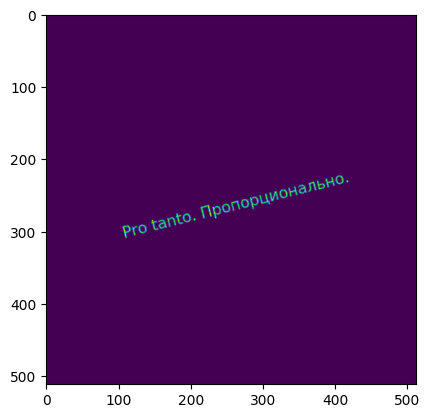

In [57]:
pic = plt.imread('1b601b.png')

r = pic[:,:,0]
g = pic[:,:,1]
b  = pic[:,:,2]

left_up = r[:256,256:]
left_up = left_up[:,::-1]

right_up = r[:256, :256]
right_up = 1-np.rot90(right_up, 2)[:,::-1]

left_down =  r[256:, :256]
left_down =  1-np.rot90(left_down, 1)[:,::-1]

right_down = r[256:, 256:]
right_down = np.rot90(right_down, 0)[:,::-1]

ax = plt.gca()
up =  np.concatenate([left_up,right_up],axis = 1)
down = np.concatenate([left_down,right_down], axis = 1)
final_pic = np.concatenate([up,down])
ax.imshow(b-final_pic)



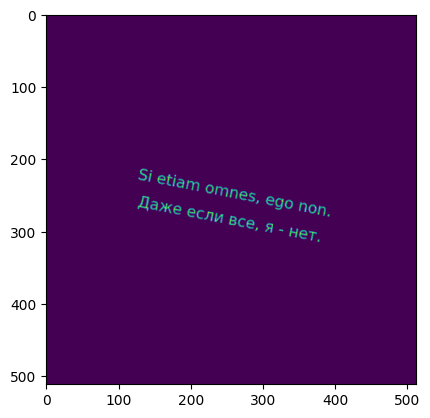

In [58]:
pic = plt.imread('000e08.png')

r = pic[:,:,0]
g = pic[:,:,1]
b  = pic[:,:,2]

left_up = b[:256,:256]
left_up = 1-left_up[:,::-1]

right_up = b[256:, 256:]
right_up = np.rot90(right_up,2)[:,::-1]

left_down =  b[256:, :256]
left_down = left_down[:,::-1]

right_down = b[:256,256:]
right_down = 1-np.rot90(right_down, 1)[:,::-1]

ax = plt.gca()

up =  np.concatenate([left_up,right_up],axis = 1)
down = np.concatenate([left_down,right_down], axis = 1)
final_pic = np.concatenate([up,down])
ax.imshow(r-final_pic)

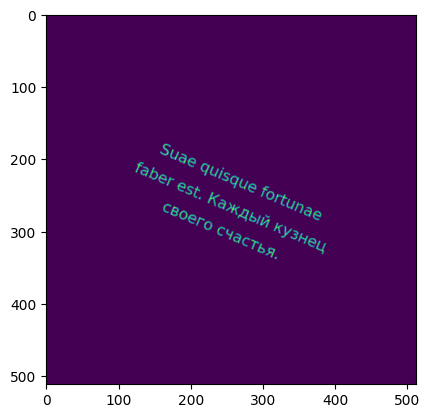

In [59]:
pic = plt.imread('0b1153.png')

r = pic[:,:,0]
g = pic[:,:,1]
b  = pic[:,:,2]

left_up = g[256:,256:]
left_up = left_up[:,::-1]

right_up = g[:256,256:]
right_up = 1-np.rot90(right_up,1)[:,::-1]

left_down =  g[256:, :256]
left_down = 1-np.rot90(left_down,2)[:,::-1]

right_down = g[:256,:256]
right_down = right_down[:,::-1]

ax = plt.gca()
up =  np.concatenate([left_up,right_up],axis = 1)
down = np.concatenate([left_down,right_down], axis = 1)
final_pic = np.concatenate([up,down])
ax.imshow(r-final_pic)


## Matplotlib [10/100]

### Matplotlib A [5/100]

Используя данные из задачи **Numpy A** визуализировать:
- точки
- треугольники (цветом треугольника показать его площадь)
- центры треугольников

Выполнить поворот всех треугольников:
 - относительно геометрического центра на -90 градусов,
 - затем на 90, 180, 270, 360 градусов вокруг начала координат и визуализировать все 4 повернутых фигуры на одном рисунке способом, указанным в начале задания.

(-0.5, 10.5, -0.5, 10.5)

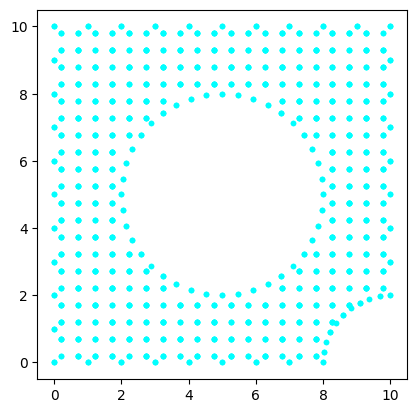

In [60]:
#Точки
plt.scatter(tr[:,:,0],tr[:,:,1], color = ("cyan"), s = 3**2)
plt.axis("scaled")

(-0.5, 10.5, -0.5, 10.5)

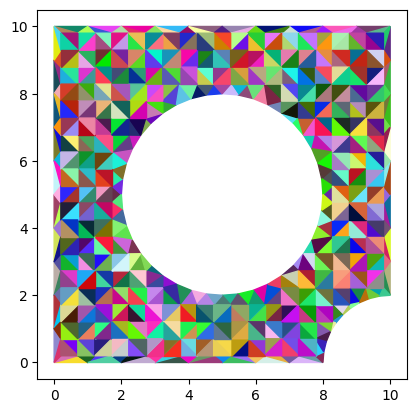

In [61]:
#Треугольники
ax = plt.gca()
for tr_1 in tr:
    fig = plt.Polygon(tr_1,color =(random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)) )
    ax.add_patch(fig)
plt.axis("scaled")


(-0.5, 10.5, -0.5, 10.5)

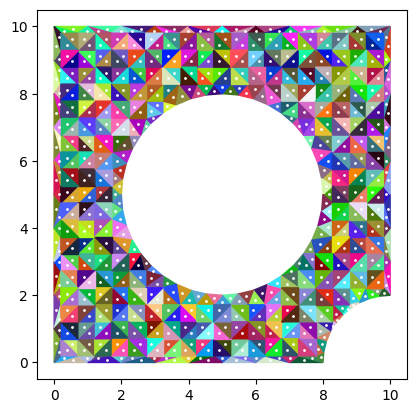

In [62]:
#Треугольники с центрами
ax = plt.gca()
for tr_1 in tr:
    fig = plt.Polygon(tr_1,color =(random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)) )
    ax.add_patch(fig)
plt.scatter(triangles_centres[:,0],triangles_centres[:,1],s = 1, color = (1,1,1))
plt.axis("scaled")

(-1.0673684210526315,
 11.067368421052633,
 -1.0673684210526306,
 11.067368421052633)

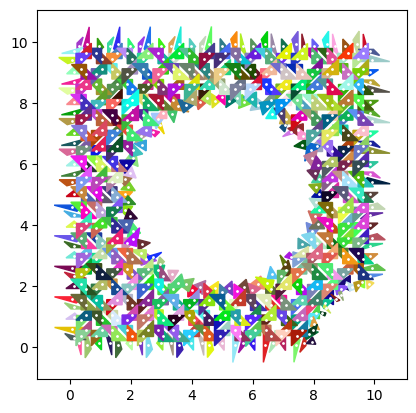

In [63]:
#Поворот на -90 относительно геометрического центра
tr_rotated = []
for i in range(len(tr)):
    xs = (tr[i][:,0]-triangles_centres[i,0])*np.cos(-np.pi/2) - (tr[i][:,1]-triangles_centres[i,1])*np.sin(-np.pi/2)+triangles_centres[i,0]
    ys = (tr[i][:,0]-triangles_centres[i,0])*np.sin(-np.pi/2) + (tr[i][:,1]-triangles_centres[i,1])*np.cos(-np.pi/2)+triangles_centres[i,1]
    tr_rotated.append(([xs,ys]))

rot = np.array(tr_rotated)
tr2 = []
for i in rot:
    tr2.append(i.transpose())
rotated_out = np.array(tr2)

ax = plt.gca()
for tr_1 in rotated_out:
    fig = plt.Polygon(tr_1,color =(random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)) )
    ax.add_patch(fig)
plt.scatter(triangles_centres[:,0],triangles_centres[:,1],s = 1, color = (1,1,1))
plt.axis("scaled")


(-11.000000000000002, 11.000000000000002, -11.000000000000002, 11.0)

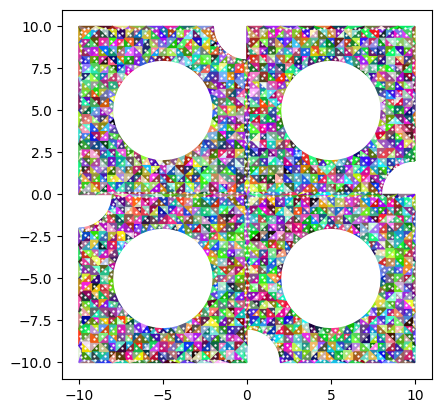

In [64]:
#поворот треугольников относительно центра координат, обход против часовой стрелки, начиная с верхнего левого
def rotate(angle):
    tr_rotated = []
    for i in range(len(tr)):
        xs = (tr[i][:,0])*np.cos(angle) - (tr[i][:,1])*np.sin(angle)
        ys = (tr[i][:,0])*np.sin(angle) + (tr[i][:,1])*np.cos(angle)
        tr_rotated.append(([xs,ys]))

    rot = np.array(tr_rotated)
    tr2 = []
    for i in rot:
        tr2.append(i.transpose())
    return np.array(tr2)

rot_90 = rotate(np.pi/2)
rot_180 = rotate(np.pi)
rot_270 = rotate(3*np.pi/2)
rot_360 = rotate(2*np.pi)

ax = plt.gca()
for i in range(len(tr)):
    fig = plt.Polygon(rot_90[i],color =(random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)) )
    ax.add_patch(fig)
    fig = plt.Polygon(rot_180[i],color =(random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)) )
    ax.add_patch(fig)
    fig = plt.Polygon(rot_270[i],color =(random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)) )
    ax.add_patch(fig)
    fig = plt.Polygon(rot_360[i],color =(random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)) )
    ax.add_patch(fig)

new_c =  np.sum(rot_90[:]/3, axis = 1)
plt.scatter(new_c[:,0],new_c[:,1],s = 0.5, color = (1,1,1))
new_c =  np.sum(rot_180[:]/3, axis = 1)
plt.scatter(new_c[:,0],new_c[:,1],s = 0.5, color = (1,1,1))
new_c =  np.sum(rot_270[:]/3, axis = 1)
plt.scatter(new_c[:,0],new_c[:,1],s = 0.5, color = (1,1,1))
new_c =  np.sum(rot_360[:]/3, axis = 1)
plt.scatter(new_c[:,0],new_c[:,1],s = 0.5, color = (1,1,1))
plt.axis("scaled")

### Matplotlib B [5/100]

Повторить рисунок:

![arctan_x_cos_y.png](arctan_x_cos_y.png)

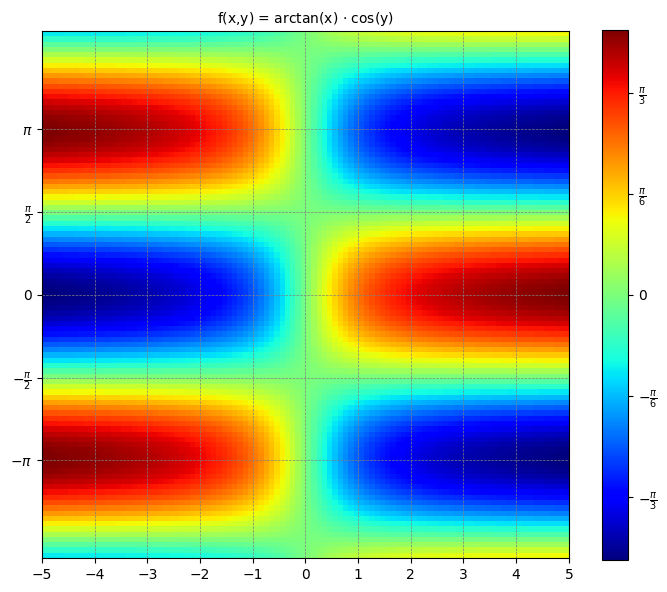

In [65]:
x = np.linspace(-5,5,100)
y = x.reshape(-1,1)
f_x_y = np.arctan(x)*np.cos(y)

fig, ax = plt.subplots(figsize=(8.5, 8.5))
ax.set_xticks(np.arange(-5, 6, 1))
ax.set_yticks(np.arange(-np.pi, np.pi + np.pi/2, np.pi/2))
ax.set_yticklabels(["$-\pi$",r"$-\frac{\pi}{2}$","0",r"$\frac{\pi}{2}$","$\pi$"])
ax.set_title("f(x,y) = arctan(x) $\cdot$ cos(y)", fontsize = 10)
ax.grid(color = "grey", linestyle = "--", linewidth = 0.5)
a = ax.imshow(f_x_y, cmap = "jet",extent=[-5,5,-5,5])
color = plt.colorbar(a, shrink = 0.81)
color.set_ticks(np.arange(-np.pi/3, np.pi/3 + np.pi/6, np.pi/6))
color.set_ticklabels([r"$-\frac{\pi}{3}$", r"$-\frac{\pi}{6}$", "0", r"$\frac{\pi}{6}$", r"$\frac{\pi}{3}$"])

## Pandas [14/100]

При решении задач этого раздела подразумевается максимальное использование возможностей `pandas` и допускается использование `numpy`.

За использование любых сторонних циклов и их заменителей (итераторов, генераторов и др.) выставляется штраф.

### Pandas A [6/100]

В файле `fin.csv` находятся записи о доходах и расходах физического лица.

Требуется рассчитать:

- среднемесячный доход для каждого года,
- среднемесячный расход по каждой категории для каждого года,
- сводную таблицу суммарных расходов: строки - Категория/Год, столбцы - Месяц,
- состояние счета физического лица на каждый день и изобразить график (в начальный момент времени счет был нулевым),
- даты, когда счет становился отрицательным,
- построить прогноз (линейный и квадратичный) состояния счета через год после последней записи.

In [66]:
#среднемесячный доход для каждого года
fin = pd.read_csv("fin.csv")

fin2017 = fin[(fin["ВРЕМЯ"] < "2018-01-01 00:00:00") & (fin["КАТЕГОРИЯ"] == 'Доходы') ].groupby(["КАТЕГОРИЯ"]).sum(numeric_only = True) / 12
fin2018 = fin[(fin["ВРЕМЯ"] >= "2018-01-01 00:00:00") & (fin["ВРЕМЯ"] < '2019-01-01 00:00:00' ) & (fin["КАТЕГОРИЯ"] == "Доходы") ].groupby(["КАТЕГОРИЯ"]).sum(numeric_only = True) / 12
fin2019 = fin[(fin["ВРЕМЯ"] >= "2019-01-01 00:00:00") & (fin["КАТЕГОРИЯ"] == 'Доходы') ].groupby(["КАТЕГОРИЯ"]).sum(numeric_only = True) / 12

fin2017.rename(columns={"СУММА":"2017"}, inplace=True)
fin2018.rename(columns={"СУММА":"2018"}, inplace=True)
fin2019.rename(columns={"СУММА":"2019"}, inplace=True)

pd.concat([fin2017,fin2018,fin2019], axis = 1)

,2017,2018,2019
КАТЕГОРИЯ,,,
Доходы,113764.25,186374.916667,150092.166667


In [67]:
#среднемесячный расход по каждой категории для каждого года
fin2017 = fin[(fin["ВРЕМЯ"] < "2018-01-01 00:00:00") & (fin["КАТЕГОРИЯ"] != 'Доходы') ].groupby(["КАТЕГОРИЯ"]).sum(numeric_only = True) / 12
fin2018 = fin[(fin["ВРЕМЯ"] >= "2018-01-01 00:00:00") & (fin["ВРЕМЯ"] < '2019-01-01 00:00:00' ) & (fin["КАТЕГОРИЯ"] != "Доходы") ].groupby(["КАТЕГОРИЯ"]).sum(numeric_only = True) / 12
fin2019 = fin[(fin["ВРЕМЯ"] >= "2019-01-01 00:00:00") & (fin["КАТЕГОРИЯ"] != 'Доходы') ].groupby(["КАТЕГОРИЯ"]).sum(numeric_only = True) / 12


fin2017.rename(columns={"СУММА":"2017"}, inplace=True)
fin2018.rename(columns={"СУММА":"2018"}, inplace=True)
fin2019.rename(columns={"СУММА":"2019"}, inplace=True)

(pd.concat([fin2017,fin2018,fin2019], axis = 1)*-1).replace(np.nan, 0)

,2017,2018,2019
КАТЕГОРИЯ,,,
Автомобиль,1198.333333,150.000000,0.000000
Дом,25886.083333,49319.666667,33724.916667
Еда,14799.250000,27533.083333,22446.666667
Здоровье,309.416667,183.333333,178.666667
Интернет и телефон,806.750000,880.083333,922.500000
Комплектующие,20952.833333,7104.000000,7660.916667
Компьютер и программы,5718.916667,10464.083333,128.083333
Красота и здоровье,402.916667,1569.500000,958.416667
Обучение,816.750000,1893.583333,1763.583333


In [68]:
#сводную таблицу суммарных расходов: строки - Категория/Год, столбцы - Месяц
fin_sorted =fin.copy()

fin_sorted["МЕСЯЦ"],fin_sorted["ГОД"] = pd.DatetimeIndex(fin_sorted["ВРЕМЯ"]).month,  pd.DatetimeIndex(fin_sorted["ВРЕМЯ"]).year
fin_sorted.groupby(["КАТЕГОРИЯ", "ГОД", "МЕСЯЦ"]).sum(numeric_only = True)
fin_sorted_out = (pd.pivot_table(fin_sorted, index=["КАТЕГОРИЯ", "ГОД"],columns="МЕСЯЦ", values = "СУММА")*-1).replace(np.nan,0)
fin_sorted_out.drop(labels = "Доходы", axis = 0)

МЕСЯЦ                                 1             2             3   \
КАТЕГОРИЯ             ГОД                                              
Автомобиль            2017      0.000000      0.000000      0.000000   
                      2018      0.000000      0.000000   1800.000000   
Дом                   2017      0.000000      0.000000      0.000000   
                      2018   8093.125000   8587.600000  14350.000000   
                      2019  13230.000000  19750.000000  19360.000000   
Еда                   2017      0.000000      0.000000      0.000000   
                      2018   1355.882353   1187.800000   1158.800000   
                      2019    923.481481    710.393939    940.515152   
Здоровье              2017      0.000000      0.000000      0.000000   
                      2018      0.000000      0.000000      0.000000   
                      2019      0.000000      0.000000      0.000000   
Интернет и телефон    2017      0.000000      0.000000      0.000000   
                      2018   1000.000000   1000.000000    500.000000   
                      2019   1000.000000    490.000000   1333.333333   
Комплектующие         2017      0.000000      0.000000      0.000000   
                      2018   5273.500000   1027.000000      0.000000   
                      2019   6230.000000   5963.333333   1250.000000   
Компьютер и программы 2017      0.000000      0.000000      0.000000   
                      2018      0.000000    768.000000    874.000000   
                      2019      0.000000      0.000000    179.000000   
Красота и здоровье    2017      0.000000      0.000000      0.000000   
                      2018   3000.000000   2960.500000      0.000000   
                      2019   1800.000000    615.000000    700.000000   
Обучение              2017      0.000000      0.000000      0.000000   
                      2018   2292.500000   1353.666667      0.000000   
                      2019      0.000000   2900.000000  -1125.000000   
Одежда и обувь        2017      0.000000      0.000000      0.000000   
                      2018   9999.000000   1500.000000      0.000000   
                      2019      0.000000   2000.000000    540.000000   
Подарки               2017      0.000000      0.000000      0.000000   
                      2018      0.000000   1000.000000   2210.000000   
                      2019    690.000000   3450.000000    450.000000   
Путешествия           2017      0.000000      0.000000      0.000000   
                      2018    682.733333    797.000000   6000.000000   
                      2019      0.000000      0.000000      0.000000   
Развлечения           2017      0.000000      0.000000      0.000000   
                      2018   2995.000000      0.000000   1320.000000   
                      2019   3400.000000      0.000000      0.000000   
Спорт                 2017      0.000000      0.000000      0.000000   
                      2018   5358.333333   8355.333333   2940.000000   
                      2019      0.000000      0.000000      0.000000   
Стройматериалы        2017      0.000000      0.000000      0.000000   
Транспорт             2017      0.000000      0.000000      0.000000   
                      2018    514.000000    565.142857    512.692308   
                      2019    424.307692    853.125000    987.000000   
Украшения             2017      0.000000      0.000000      0.000000   
                      2018      0.000000      0.000000      0.000000   
                      2019      0.000000      0.000000   5000.000000   
Хобби                 2017      0.000000      0.000000      0.000000   
                      2018      0.000000      0.000000    876.666667   
                      2019      0.000000    800.000000    704.000000   

МЕСЯЦ                                  4             5             6   \
КАТЕГОРИЯ             ГОД                                               
Автомобиль            2017       0.00

In [69]:
#состояние счета физического лица на каждый день
fin_day = fin.copy()
fin_day["Месяц"],fin_day["Год"],fin_day["День"] = pd.DatetimeIndex(fin_sorted["ВРЕМЯ"]).month,  pd.DatetimeIndex(fin_sorted["ВРЕМЯ"]).year,pd.DatetimeIndex(fin_sorted["ВРЕМЯ"]).day
fin_day_cum = fin_day.groupby(['Год', "Месяц", "День"]).sum(numeric_only = True)
fin_day_cum["СУММА"] = fin_day_cum["СУММА"].cumsum()
fin_day_cum.rename(columns={"СУММА":"Счет"}, inplace=True)
fin_day_cum

Счет
Год  Месяц День          
2017 4     28      -958.0
           29    -23550.0
           30    -51730.0
     5     1     -56522.0
           2     -58247.0
...                   ...
2019 9     12    830636.0
           13    787110.0
           14    774066.0
           15    771285.0
           16    769717.0

[707 rows x 1 columns]

<AxesSubplot: xlabel='Дата', ylabel='Состояние счета'>

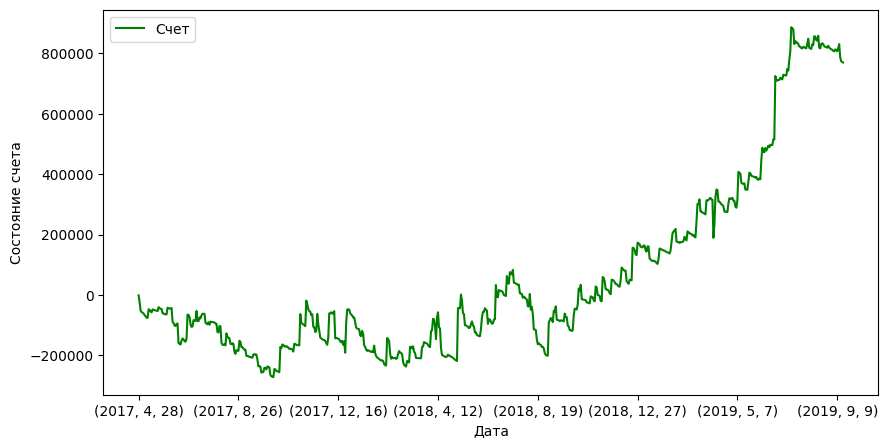

In [70]:
fin_day_cum.plot(figsize = (10,5), color = "green", xlabel = "Дата", ylabel = "Состояние счета")

In [71]:
#даты, когда счет становился отрицательным
temp_fin = fin_day_cum/fin_day_cum.__abs__()
temp_fin2= temp_fin.diff()
temp_fin2.loc[(temp_fin2["Счет"] != 2) & (temp_fin2["Счет"] != 0)  ].drop(columns = "Счет")


Empty DataFrame
Columns: []
Index: [(2017, 4, 28), (2018, 5, 12), (2018, 6, 23), (2018, 7, 3), (2018, 7, 23), (2018, 8, 4), (2018, 10, 13), (2018, 11, 6)]

Text(0, 0.5, 'Деньги, в млн')

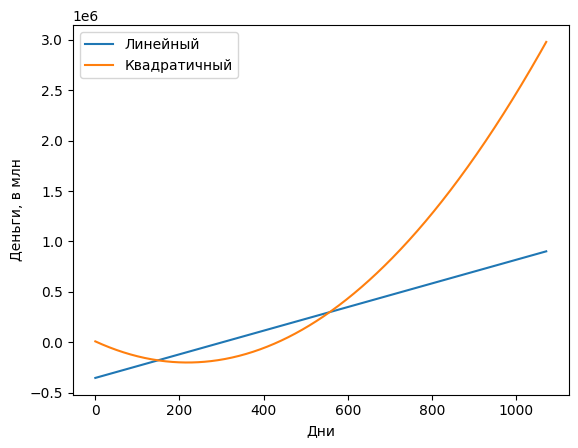

In [72]:
#построить прогноз (линейный и квадратичный) состояния счета через год после последней записи

#линейный
plt.plot(np.linspace(0, fin_day_cum.size+365, fin_day_cum.size), np.poly1d(np.polyfit(np.arange(fin_day_cum.size), fin_day_cum['Счет'].values, 1))(np.linspace(0, fin_day_cum.size+365, fin_day_cum.size)), label = "Линейный")

#квадратичный
plt.plot(np.linspace(0, fin_day_cum.size+365, fin_day_cum.size), np.poly1d(np.polyfit(np.arange(fin_day_cum.size), fin_day_cum['Счет'].values, 2))(np.linspace(0, fin_day_cum.size+365, fin_day_cum.size)), label = "Квадратичный")

plt.gca().legend()
plt.gca().set_xlabel("Дни")
plt.gca().set_ylabel("Деньги, в млн")

### Pandas B [8/100]

В файле `students.csv` находится список студентов. 
В файле `grades.csv` - оценки за контрольную работу.

Столбец `hash` однозначно идентифицирует студента.

Контрольная работа состояла из 8 заданий. Веса всех заданий - одинаковые.

Требуется ответить на вопросы / вычислить:
- кто написал контрольную работу, а кто - нет?
- средняя оценка по каждому заданию у каждой группы? по всем заданиям у каждой группы?
- топ-5 лидеров и топ-5 отстающих.

По информации об оценках:
- выделить 2 главных компоненты при помощи `sklearn.decomposition.PCA`;
    - визуализировать результат `plt.scatter`;
    
    
- разбить на 4 кластера при помощи `sklearn.cluster.k_means`;
    - визуализировать предыдущий массив, используя в качестве цвета номер кластера;
    - на том же рисунке отметить центр кластера и подписать его номер;
    - вычислить для каждого кластера среднюю и медианную оценки;
    - для каждого кластера вывести номера групп.


In [73]:
students = pd.read_csv("students.csv")
grades = pd.read_csv("grades.csv")

In [74]:
#работа написана
sheet = pd.merge(students, grades)
sheet

,Группа,Фамилия,Имя,Отчество,hash,Unnamed: 0,0,1,2,3,4,5,6,7,8
0,БПМ-161,Антонов,Алексей,Алексеевич,6875ba52f0,8,0.0,0.9,0.0,0.5,0.5,0.0,0.0,0.0,0.0
1,БПМ-161,Арсамакова,Алина,Ибрагимовна,7ca01c996f,5,0.5,0.8,0.5,0.5,0.0,0.0,0.0,0.0,0.0
2,БПМ-161,Богатов,Антон,Юрьевич,15360bcc4c,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,БПМ-161,Бычков,Андрей,-,f9f854aa44,10,1.0,0.9,0.0,0.5,0.5,0.0,0.0,0.0,0.0
4,БПМ-161,Гончаров,Глеб,Игоревич,3f187965b9,3,0.0,0.0,0.8,1.0,0.5,0.0,0.0,0.0,0.0
5,БПМ-161,Дудинов,Тимур,Батырович,e1388f2aae,35,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,БПМ-161,Иванов,Артём,Владиславович,a2d96fe1d4,14,0.0,0.7,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7,БПМ-161,Кубышкина,Екатерина,Константиновна,6588f97aea,20,0.0,0.6,1.0,1.0,1.0,0.5,0.0,0.0,0.7
8,БПМ-161,Мартынов,Никита,Игоревич,bf1e56e185,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,БПМ-161,Плешко,Георгий,Дмитриевич,5a0a06b184,18,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [75]:
#работа не написана
students.merge(sheet, how='left', indicator=True).query("_merge == 'left_only'").drop('_merge', axis=1)[students.columns]


,Группа,Фамилия,Имя,Отчество,hash
4,БПМ-161,Высоцкий,Яков,Михайлович,1d1d05c257
5,БПМ-161,Галигеров,Владислав,Сергеевич,738b683ed7
7,БПМ-161,Городилов,Илья,Игоревич,6df2f31eb9
10,БПМ-161,Корякин,Дмитрий,Александрович,8bb7fb51c3
12,БПМ-161,Ларичева,Мария,Максимовна,9c08206449
13,БПМ-161,Лещёв,Дмитрий,Андреевич,ab62ea6c3f
14,БПМ-161,Мансуров,Рустам,Айратович,851c8c0374
16,БПМ-161,Мезенцев,Глеб,Владимирович,6c6425fbe2
17,БПМ-161,Пилипчук,Серафим,Викторович,4b132d7b99
21,БПМ-161,Сидоров,Никита,Рихардович,85a9cf3db4


In [76]:
#средняя оценка по каждому заданию
grade_by_group = sheet.groupby(["Группа"]).mean(numeric_only = True).drop(columns = "Unnamed: 0")
grade_by_group

,0,1,2,3,4,5,6,7,8
Группа,,,,,,,,,
БПМ-161,0.133333,0.527778,0.550000,0.633333,0.238889,0.094444,0.055556,0.044444,0.088889
БПМ-162,0.761111,0.883333,0.733333,0.766667,0.544444,0.266667,0.305556,0.155556,0.427778
БПМ-163,0.100000,0.950000,1.000000,1.000000,0.500000,0.500000,0.000000,0.000000,0.300000


In [77]:
#средняя оценка за все задания
grade_by_group.mean(axis = 1)

Группа
БПМ-161    0.262963
БПМ-162    0.538272
БПМ-163    0.483333
dtype: float64

In [78]:
#топ 5 лидеров
sheet2 = sheet.copy()
sheet2["Сумма"] = sheet2["0"]+sheet2["1"]+sheet2["2"]+sheet2["3"]+sheet2["4"]+sheet2["5"]+sheet2["6"]+sheet2["7"]+sheet2["8"]
sheet2.sort_values("Сумма", ascending=False)[:5].drop(columns = "Unnamed: 0")

,Группа,Фамилия,Имя,Отчество,hash,0,1,2,3,4,5,6,7,8,Сумма
29,БПМ-162,Суслопаров,Максим,Владимирович,cb9dfc5d66,0.8,1.0,1.0,1.0,0.5,0.2,0.5,0.9,0.7,6.6
24,БПМ-162,Островский,Всеволод,Петрович,2a5a018502,0.9,1.0,1.0,1.0,0.8,0.0,0.5,0.0,0.7,5.9
30,БПМ-162,Сучков,Даниил,Викторович,cbe32a2a1b,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,5.8
28,БПМ-162,Стрельцов,Макар,Андреевич,6134e7ea6f,0.8,1.0,1.0,1.0,0.5,0.2,0.5,0.0,0.7,5.7
13,БПМ-161,Хайкова,Светлана,Павловна,c11c124eb9,0.0,1.0,1.0,0.8,0.8,0.5,0.0,0.8,0.7,5.6


In [79]:
#топ 5 отстающих
sheet2.sort_values("Сумма")[:5].drop(columns = "Unnamed: 0")

,Группа,Фамилия,Имя,Отчество,hash,0,1,2,3,4,5,6,7,8,Сумма
2,БПМ-161,Богатов,Антон,Юрьевич,15360bcc4c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,БПМ-161,Мартынов,Никита,Игоревич,bf1e56e185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,БПМ-162,Мязин,Михаил,Александрович,237fe82b6f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,БПМ-161,Дудинов,Тимур,Батырович,e1388f2aae,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
17,БПМ-161,Шкляр,Эрнест,-,d6c40a7f4b,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


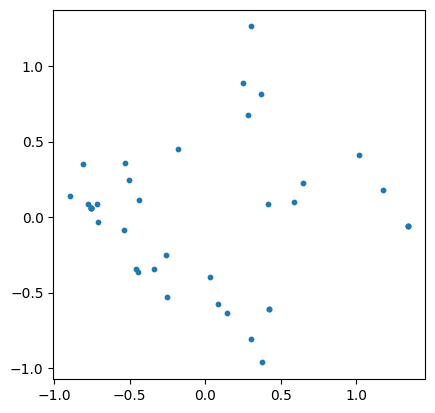

In [80]:
#2 главные компоненты и их визуализация
grades_no_names = sheet.loc[:, sheet.columns[6:16]]
dots_grades = PCA(n_components=2).fit_transform(grades_no_names)
plt.scatter(dots_grades[:,0],dots_grades[:,1], s = 10)
plt.gca().set_aspect(1)

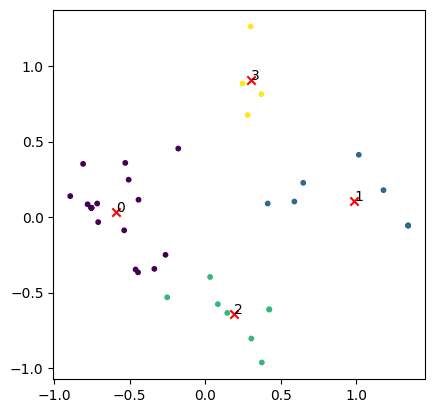

In [81]:
#визуализация кластеров
clusters = KMeans(n_clusters=4,n_init=10).fit(dots_grades)
cluster_grades = clusters.predict(dots_grades)
cluster_centres = clusters.cluster_centers_

plt.scatter(dots_grades[:,0],dots_grades[:,1],c = cluster_grades, s = 10)

plt.scatter(cluster_centres[:,0],cluster_centres[:,1], marker = "x", color = "red")
plt.text(cluster_centres[0,0],cluster_centres[0,1],"0")
plt.text(cluster_centres[1,0],cluster_centres[1,1],"1")
plt.text(cluster_centres[2,0],cluster_centres[2,1],"2")
plt.text(cluster_centres[3,0],cluster_centres[3,1],"3")

plt.gca().set_aspect(1)

In [82]:
#медианная оценка
sheet_cluster = sheet2.copy().drop(columns = ["Unnamed: 0","hash"])
sheet_cluster["Кластеры"] = cluster_grades
sheet_cluster.groupby("Кластеры").median(numeric_only = True)

,0,1,2,3,4,5,6,7,8,Сумма
Кластеры,,,,,,,,,,
0,0.8,1.00,1.00,1.00,0.5,0.10,0.5,0.00,0.7,5.45
1,0.0,0.65,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.75
2,0.0,0.20,0.95,1.00,0.0,0.00,0.0,0.00,0.0,2.50
3,0.8,0.95,0.00,0.35,0.5,0.35,0.0,0.45,0.1,3.60


In [83]:
#средняя оценка
sheet_cluster.groupby("Кластеры").mean(numeric_only = True)

,0,1,2,3,4,5,6,7,8,Сумма
Кластеры,,,,,,,,,,
0,0.638889,0.916667,0.955556,0.927778,0.644444,0.283333,0.305556,0.094444,0.494444,5.261111
1,0.062500,0.500000,0.062500,0.212500,0.125000,0.000000,0.000000,0.000000,0.000000,0.962500
2,0.112500,0.375000,0.925000,0.925000,0.125000,0.087500,0.125000,0.000000,0.025000,2.700000
3,0.850000,0.950000,0.000000,0.350000,0.375000,0.425000,0.000000,0.475000,0.200000,3.625000


In [84]:
#номера групп по кластерам
#если требуется вывести именно студентов по кластерам, необходимо убрать ["Группа"] в конце строки в каждой ячейке
#кластер 0
sheet_cluster.loc[sheet_cluster["Кластеры"] == 0]["Группа"]

7     БПМ-161
13    БПМ-161
18    БПМ-162
19    БПМ-162
20    БПМ-162
23    БПМ-162
24    БПМ-162
25    БПМ-162
26    БПМ-162
28    БПМ-162
29    БПМ-162
30    БПМ-162
31    БПМ-162
32    БПМ-162
34    БПМ-162
35    БПМ-162
36    БПМ-163
37    БПМ-163
Name: Группа, dtype: object

In [85]:
#кластер 1
sheet_cluster.loc[sheet_cluster["Кластеры"] == 1]["Группа"]

0     БПМ-161
1     БПМ-161
2     БПМ-161
5     БПМ-161
8     БПМ-161
12    БПМ-161
17    БПМ-161
22    БПМ-162
Name: Группа, dtype: object

In [86]:
#кластер 2
sheet_cluster.loc[sheet_cluster["Кластеры"] == 2]["Группа"]

4     БПМ-161
6     БПМ-161
9     БПМ-161
10    БПМ-161
11    БПМ-161
14    БПМ-161
15    БПМ-161
16    БПМ-161
Name: Группа, dtype: object

In [87]:
#кластер 3
sheet_cluster.loc[sheet_cluster["Кластеры"] == 3]["Группа"]

3     БПМ-161
21    БПМ-162
27    БПМ-162
33    БПМ-162
Name: Группа, dtype: object

## Scipy [14/100]

При решении задач этого раздела подразумевается использование методов и алгоритмов в `Scipy`.


### Scipy A [7/100]

Построить 100 фазовых траекторий $\dot x(x), \dot y(y)$, а также зависимостей $y(x)$ для задачи "хищник-жертва"; подписать оси

Задача "хищник-жертва" описывается моделью Лотки-Вольтерры:


$\begin{cases}
\dot x = \alpha x - \beta x y \\
\dot y = \delta x y - \gamma y \\
\end{cases}$

где $x(t)$ - размер популяции жертв, $y(t)$ - размер популяции хищников.

Параметры модели $\alpha, \beta, \gamma, \delta$ выбрать самостоятельно.

Начальные условия взять на линии $y = x$ на отрезке $[0.1, 1.1]$, параметризовав отрезок при помощи $\alpha \in [0, 1]$.

Вычислить периоды колебаний $T(\alpha)$ размеров популяций жертв и хищников и изобразить график $T(\alpha)$.

Text(0, 0.5, 'Хищники')

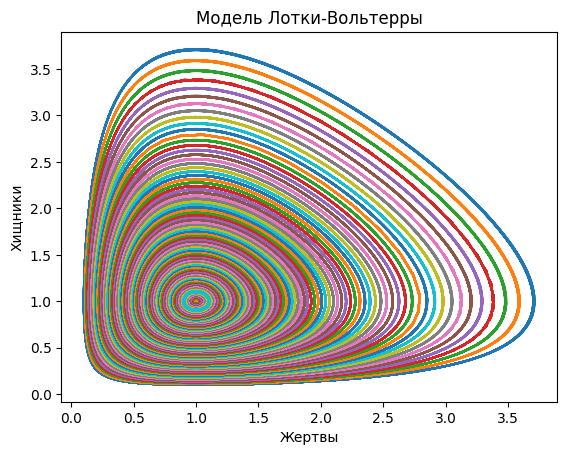

In [88]:
alpha = 1
beta = 1
gamma = 1
delta = 1
x_0 = 0.8
y_0 = 0.8
x_y_0=[x_0,y_0]

#100 фазовых траекторий
def equation_system(x_y,unused):
    return np.array([alpha*x_y[0]-beta*x_y[0]*x_y[1],delta*x_y[0]*x_y[1]-gamma*x_y[1]])

for i in np.linspace(0.1,1.1,100):
    rtxy = scipy.integrate.odeint(equation_system,[i,1], np.linspace(0, 100, 1000))
    plt.plot(rtxy[:, 0],rtxy[:, 1])

plt.title("Модель Лотки-Вольтерры")
plt.xlabel('Жертвы')
plt.ylabel('Хищники')




Text(0, 0.5, 'Размер популяции')

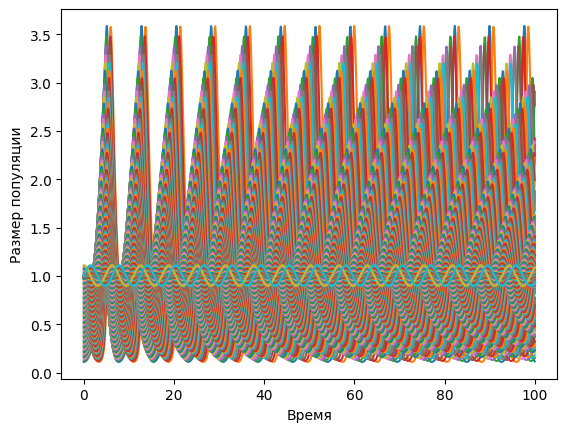

In [89]:
#периоды колебаний 100 популяций
for i in np.linspace(0.1,1.1,100):
    rtxy = scipy.integrate.odeint(equation_system,[i+1.1/100,1], np.linspace(0, 100, 1000))
    plt.plot(np.linspace(0, 100, 1000),rtxy.T[0])
    plt.plot(np.linspace(0, 100, 1000),rtxy.T[1])

plt.xlabel("Время")
plt.ylabel("Размер популяции")


### Scipy B [7/100]

Численно определить период колебаний [математического маятника](https://ru.wikipedia.org/wiki/Математический_маятник) для всех режимов его движения:
- малые колебания (гармонические),
- большие колебания,
- вращение с переходом через неустойчивое положение равновесия.

Для одного периода колебаний построить графики: 
- изменения угла и угловой скорости от времени $\theta(t), \dot \theta(t)$.
- фазовой траектории $\dot \theta(\theta)$

При помощи `holoviews` создать анимированный график движения маятника в координатной и фазовой плоскостях, схожего с приведенными по [ссылке](https://ru.wikipedia.org/wiki/Математический_маятник).

In [90]:
def eqv(t, s):
    ds = np.empty_like(s)
    theta, omega = s[::2], s[1::2]
    ds[::2] = omega
    ds[1::2] = -np.sin(theta)
    return ds

def event(t, s):
    return s[0]

event.terminal = False
event.direction = -1

#время наблюдения
t0 = 0
t1 = 10

#малые колебания
s0 = np.array([np.radians(1), 0])

solution = scipy.integrate.solve_ivp(eqv, [t0, t1], s0, max_step=0.1, rtol=1e-12, atol=1e-12,events = event)
print(solution.t_events[0][0]*4)

6.283304932200887


In [91]:
#большие колебания
s0 = np.array([np.radians(150), 0])

solution = scipy.integrate.solve_ivp(eqv, [t0, t1], s0, max_step=0.1, rtol=1e-12, atol=1e-12,events = event)
print(solution.t_events[0][0]*4)

11.07225258147158


In [92]:
#вращение с переходом через неустойчивое положение равновесия
s0 = np.array([0, np.radians(120)])

t0, t1 = 0, 50

solution = scipy.integrate.solve_ivp(eqv, [t0, t1], s0, max_step=0.1, rtol=1e-12, atol=1e-12, events=event)
#такой вид вращения непериодичен

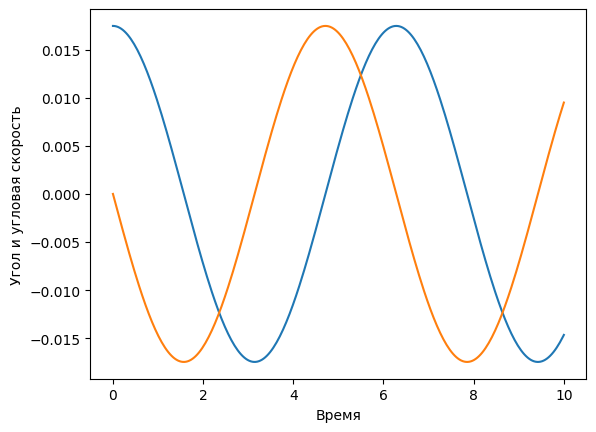

In [93]:
#график изменения угла и угловой скорости от времени для малых значений
t0 = 0
t1 = 10
s0 = np.array([np.radians(1), 0])
solution = scipy.integrate.solve_ivp(eqv, [t0, t1], s0, max_step=0.1, rtol=1e-12, atol=1e-12,events = event)

plt.plot(solution.t, solution.y[0])
plt.plot(solution.t, solution.y[1])
plt.xlabel("Время")
plt.ylabel("Угол и угловая скорость");

Text(0.5, 1.0, 'Фазовая траектория')

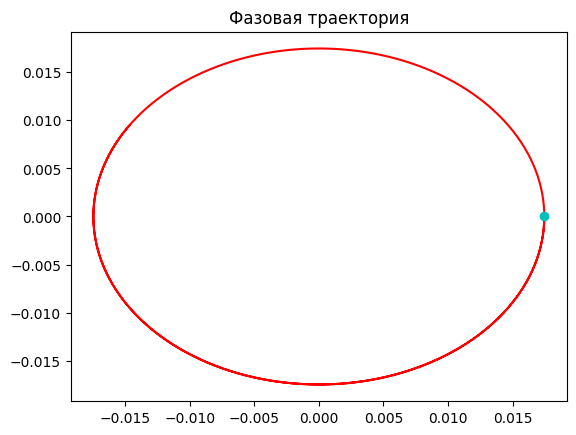

In [94]:
#Фазовая траекторая для малых колебаний
plt.plot(*solution.y, color = "red")
plt.plot(*s0, "oc")
plt.title('Фазовая траектория')
#plt.gca().set_aspect(1)

## Numba [14/100]

При решении задач этого раздела подразумевается использование возможностей `numba` и `numpy` и допускается использование `joblib`.

### Numba A [6/100]

Создать функции для расчета [фрактала Ляпунова](https://ru.wikipedia.org/wiki/Фрактал_Ляпунова), откомпилировать и распараллелить расчеты, используя возможности `numba` или `joblib`.
Построить интерактивный рисунок с возможностью перемещения и масштабирования фрактала при помощи `holoviews`.


### Numba B [8/100]

Реализовать метод численного интегрирования [Рунге-Кутты](https://ru.wikipedia.org/wiki/Метод_Рунге_—_Кутты) 4 порядка с постоянным шагом по времени. 
Выполнить компиляцию при помощи `numba`.

Сравнить время вычислений при решении задачи Коши для модели, описанной в задаче **Scipy B**:
- scipy.integrate.solve_ivp (метод `DOPRI5`)
- scipy.integrate.ode (метод `DOPRI5`)
- ваша реализация


## Classes [14/100]

Создать иерархию классов `Shape` $\leftarrow$ `Circle`, `Rectangle`, `Union`, `Intersection`, `Not`.

Класс `Shape` содержит абстрактные методы `draw(self, ax=None)`, `distance(self, x, y)`.

Вся иерархия должна содержать:
- конструктор `__init__`:
    - классы `Circle` и `Rectangle` получают необходимые координаты, размеры, цвет;
    - классы `Union`, `Intersection`, `Not` получают ссылки на другие объекты наследников класса `Shape`;
    
    
- метод `draw(self, ax=None)`, который отрисовывает объект при помощи `matplotlib`:
    - `ax` - оси рисунка `matplotlib`; если `ax==None`, то рисовать в текущих осях;
    - `Circle` и `Rectangle` отображают себя при помощи `plt.Circle`, `plt.Rectangle`;
    - классы `Union`, `Intersection`, `Not` отображают объекты, на которых они построены;
    
    
- метод `distance(self, x, y)` возвращает расстояние от границы объекта до точки `(x, y)`:
    - смотри что такое Signed Distance Field в конце текста;
    - расстояние должно иметь знак, т.е., если точка внутри объекта, то расстояние должно быть отрицательным;
    - `Union.distance` = минимальное из расстояний от точки до всех его объектов;
    - `Intersection.distance` = максимальное из расстояний от точки до всех его объектов;
    - `Not.distance` = расстояние, взятое с обратным знаком.

Необходимо:
- создать не менее одного объекта каждого класса (кроме `Shape`) и построить один сборный объект `f`;
- визуализировать объект `f` (должен корректно отработать его метод `draw`);
- вычислить метод `f.distance` на регулярной решетке размером 200х200 точек (решетка должна покрывать весь объект `f`);
- визуализировать полученную матрицу расстояний, например при помощи `plt.pcolormesh`;
- на этом же рисунке изобразить контурную линию уровня 0 (`plt.contour`);
- выполнить аннотацию типов для всех ваших методов и функций.

Пример:

```
c1 = Circle(5, 5, 3, color=(1, 0, 0, 0.5))
c2 = Circle(6.5, 6.5, 1, color=(0, 1, 0, 0.5))
c3 = Circle(3.5, 3.5, 1, color=(0, 1, 0, 0.5))
c4 = Circle(6.5, 3.5, 1, color=(0, 1, 0, 0.5))
c5 = Circle(3.5, 6.5, 1, color=(0, 1, 0, 0.5))
c6 = Circle(5, 5, 1, color=(0, 1, 0, 0.5))
r = Rect(3.5, 3.5, 6.5, 6.5, color=(0, 0, 1, 0.5))
u = Intersection(Intersection(Union(r, c2, c3, c4, c5), c1), Not(c6))
```

<table>
    <tr>
        <td><img src='classes_plot.png' width=350/></td>
        <td><img src='classes_sdf.png' width=400/></td>
    </tr>
</table>

Полезные ссылки:
- [Основы Signed Distance Field в 2D](https://habr.com/ru/post/438316/)

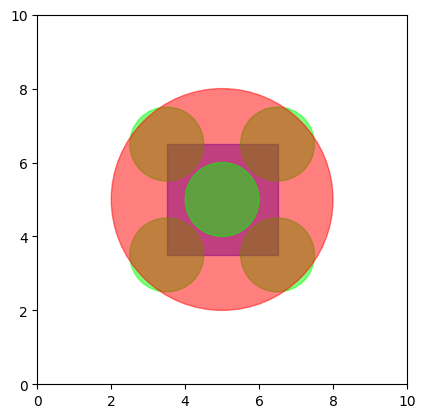

In [95]:
import typing
class Shape():
    def __init__(self,x: typing.Union[int,float],y: typing.Union[int,float],color: typing.Any)-> None:
        self.x = x
        self.y =y
        self.color = color
    @abstractmethod
    def draw(self,ax: plt.axes = None) -> None:
        """ abstractmethod """
    @abstractmethod
    def distance(self,x: typing.Union[int,float],y: typing.Union[int,float]) -> float:
        """ abstractmethod """

class Rect(Shape):
    def __init__(self,x: typing.Union[int,float],y: typing.Union[int,float],h: typing.Union[int,float],w: typing.Union[int,float], color: typing.Any) -> None:
        super().__init__(x,y, color)
        self.h = h
        self.w = w
    def draw(self,ax: plt.axes = None) -> None:
        if ax == None:
            ax = plt.gca()
        tmp = plt.Rectangle((self.x,self.y),self.w, self.h, color = self.color)
        ax.add_patch(tmp)

    def distance(self,x: typing.Union[int,float],y: typing.Union[int,float]) -> float:
        if x >= self.x and x <= self.x+self.w and y >= self.y and y <= self.y+self.h:
            rast = -min(abs(y-self.y),abs(y-(self.y+self.h)),abs(x-self.x),abs(x-(self.x+self.w)))
            if abs(rast) == 0:
                return 0.0
            return rast
        if x >= self.x and x <= self.x+self.w:
            return min(abs(y-self.y),abs(y-(self.y+self.h)))
        elif y >= self.y and y <= self.y+self.h:
            return min(abs(x-self.x),abs(x-(self.x+self.w)))
        else:
            rast = min(np.linalg.norm([self.x-x,self.y-y]),np.linalg.norm([self.x+self.w-x,self.y-y]),np.linalg.norm([self.x+self.w-x,self.y+self.h-y]),np.linalg.norm([self.x-x,self.y+self.w-y]))
            return rast

class Circle(Shape):

    def __init__(self,x: typing.Union[int,float],y: typing.Union[int,float],r: typing.Union[int,float],color: typing.Any) ->None:
        super().__init__(x,y,color)
        self.r = r

    def draw(self,ax: plt.axes = None) -> None:
        if ax == None:
            ax = plt.gca()
        tmp = plt.Circle((self.x,self.y),self.r, color = self.color)
        ax.add_patch(tmp)

    def distance(self,x: typing.Union[int,float],y: typing.Union[int,float]) ->float:
        rast = math.sqrt((x-self.x)**2+(y-self.y)**2) - self.r
        return rast


class Union(Shape):

    def __init__(self,*ar_of_figs: Shape) ->None:
        super().__init__(0,0,"red")
        self.ar_of_figs = ar_of_figs

    def draw(self, ax: plt.axes = None) -> None:
        if ax == None:
            ax = plt.gca()
        for fig in self.ar_of_figs:
            fig.draw()

    def distance(self,x: typing.Union[int,float],y: typing.Union[int,float])->float:
        ar_tmp = []
        for fig in self.ar_of_figs:
            ar_tmp.append(fig.distance(x,y))
        return min(ar_tmp)

class Not(Shape):

    def __init__(self,fig: Shape) -> None:
        super().__init__(0,0,"red")
        self.fig = fig

    def draw(self, ax: plt.axes = None) -> None:
        if ax == None:
            ax = plt.gca()
        self.fig.draw()

    def distance(self,x: typing.Union[int,float],y: typing.Union[int,float])->float:
        return -self.fig.distance(x,y)

class Intersection(Shape):

    def __init__(self,*ar_of_figs: Shape) -> None:
        super().__init__(0,0, "red")
        self.ar_of_figs = ar_of_figs

    def draw(self, ax:plt.axes = None) ->None:
        if ax == None:
            ax = plt.gca()
        for fig in self.ar_of_figs:
            fig.draw()

    def distance(self,x:typing.Union[int,float],y:typing.Union[int,float]) -> float:
        ar_tmp = []
        for fig in self.ar_of_figs:
            ar_tmp.append(fig.distance(x,y))
        return max(ar_tmp)

fig, ax = plt.subplots()
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_aspect(1)
#основная часть
c1 = Circle(5, 5, 3, color=(1, 0, 0, 0.5))
c2 = Circle(6.5, 6.5, 1, color=(0, 1, 0, 0.5))
c3 = Circle(3.5, 3.5, 1, color=(0, 1, 0, 0.5))
c4 = Circle(6.5, 3.5, 1, color=(0, 1, 0, 0.5))
c5 = Circle(3.5, 6.5, 1, color=(0, 1, 0, 0.5))
c6 = Circle(5, 5, 1, color=(0, 1, 0, 0.5))
r = Rect(3.5, 3.5, 3, 3, color=(0, 0, 1, 0.5))

u = Intersection(Intersection(Union(r, c2, c3, c4, c5), c1), Not(c6))
#визуализация сборной фигуры
u.draw()



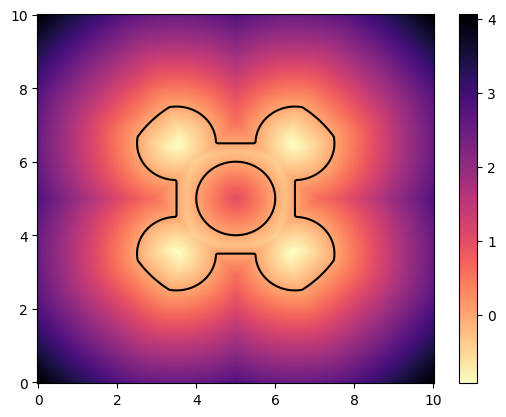

In [96]:

fig, ax = plt.subplots()
xx = np.linspace(0,10,200)
yy = np.linspace(0,10,200)
#вычисление матрицы расстояний на решетке 200х200
reshetka = np.empty((200,200))

for i,xs in enumerate(xx):
    for j,ys in enumerate(yy):
        reshetka[i,j] = u.distance(xs,ys)

#визуализация colormesh + линии уровня
colormesh = ax.pcolormesh(xx,yy,reshetka, cmap = "magma_r")
plt.colorbar(colormesh)
plt.contour(xx,yy,reshetka, levels = 0, colors = (0,0,0))

## Generators [10/100]

При решении задач этого раздела необходимо создать генераторы, т.е. функции, позволяющие вычислять следующий элемент последовательности. Допускается конструирование на основе существующих генераторов (напр., `range`, `map`, и т.д.)


## Generators A [5/100]

Создать генераторы:

 - `lcg` для вычисления последовательности псевдослучайных чисел ([линейно-конгруэнтный генератор](https://en.wikipedia.org/wiki/Linear_congruential_generator#:~:text=Линейный%20конгруэнтный%20генератор%20(LCG)-это%20алгоритм%2C,известных%20алгоритмов%20генерации%20псевдослучайных%20чисел)),
 - `matmul` для вычисления матричного произведения двух матриц, заданных списками списков.

In [97]:
#lcg
def lcg(x_0,n,a,c,m):
    x_prev = x_0
    for i in range(n):
        x =  (a*x_prev+c)%m
        x_prev = x
        yield x

list(lcg(1,6,2,0,9))

[2, 4, 8, 7, 5, 1]

In [98]:
#matmul
def matmul(a,b):

    for i in range(len(a)):
        tt = []
        for j in range(len(b[0])):
            tmp = 0
            for k in range(len(a[0])):
                tmp += a[i][k] * b[k][j]
            tt.append(tmp)
        yield tt

a = [[3,5,6],[7,8,9]]
b = [[1,0],[6,6],[4,5]]

list(matmul(a,b))


[[57, 60], [91, 93]]

## Generators B [5/100]

Создать генератор `progress`, работающий аналогично `range` и дополнительно выводящий на экран `progress bar` (полосу прогресса).
Должны быть реализованы все варианты работы `range` (отрицательные и неотрицательные границы диапазона и шаг).

Для реализации полосы прогресса можно, например, воспользоваться виджетом `panel.indicators.Progress` из модуля `panel`, установленного вместе с `holoviews`.

Продемонстрировать работу генератора в цикле вызвав функцию `sleep` из модуля `time`.

In [103]:
import panel as pn
import holoviews
import time
pn.extension()
def progress(stop,start = 0, step =1):
    progress = pn.indicators.Progress(name='Progress', value=0, width=100)
    amount = int(100/int(abs(stop-start)/abs(step)))
    if stop > start and step > 0 and start*stop >= 0:
        while stop > start:
            yield start
            progress.value += amount
            display(progress)
            start += step
    elif stop < start and step < 0 and start*stop >= 0:
        while stop < start:
            yield stop
            progress.value += amount
            display(progress)
            stop -= step
    elif stop > start and step < 0 and start*stop < 0:
        while stop > start:
            yield stop
            progress.value += amount
            display(progress)
            stop += step
    elif stop < start and step > 0 and start*stop < 0:
        while stop < start:
            yield start
            progress.value += amount
            display(progress)
            start -= step
    else:
        return None
for i in progress(10):
    print(i)
    time.sleep(1)



0


Progress(value=10, width=100)

1


Progress(value=20, width=100)

2


Progress(value=30, width=100)

3


Progress(value=40, width=100)

4


Progress(value=50, width=100)

5


Progress(value=60, width=100)

6


Progress(value=70, width=100)

7


Progress(value=80, width=100)

8


Progress(value=90, width=100)

9


Progress(value=100, width=100)

## Decorators and Context Managers [12/100]

При решении задач этого раздела необходимо создать:
- декоратор, т.е. функцию или класс, позволяющую изменять поведение функции или метода, не затрагивая код их использующий, т.е.:

```
@my_decorator
def old_func(...):
    some instructions
    
old_func(...) # function call works as it was before decoration
```

- менеджер контекста, т.е. функцию (декорированную `@contextmanager`) или класс, обладающий методами `__enter__` и `__exit__`, позволяющий выполнять действия в некотором контексте, т.е.:

```
with my_context(...) as ctx:
    do something
    use ctx if needed
```

## Decorators and Context Managers A [4/100]

Создать декоратор, позволяющий перехватывать исключения заданного класса и выводить информацию о вызове функции и перехваченном исключении в лог-файл при помощи стандартного модуля `logging`.
Продемонстрировать его работу.

In [100]:
logger = logging.getLogger("Vitalik")
fileHandler = logging.FileHandler("logA.log")
fileHandler.setFormatter(logging.Formatter('%(asctime)s - %(levelname)s - %(message)s'))
logger.handlers = [fileHandler]
logger.setLevel(logging.INFO)

def check(exception):
    def inner_check(function):
        def wrapper(x):
            try:
                function(x)
                logger.info("Value {0} entered in {1} is valid".format(x, function.__name__))
                return function(x)
            except:
                logger.error("Value '{0}' entered in {1} got an error: {2}".format(x, function.__name__, exception.__name__))
        return wrapper
    return inner_check

@check(exception = TypeError)
def abs_of_number(number):
    return abs(number)

print(abs_of_number("str"))


None


## Decorators and Context Managers B [4/100]

Создать менеджер контекста, позволяющий перехватывать исключения заданного класса и выводить информацию о вызове функции и перехваченном исключении в лог-файл при помощи стандартного модуля `logging`.
Продемонстрировать его работу.

In [101]:
logger = logging.getLogger("Oleg")
fileHandler = logging.FileHandler("logB.log")
fileHandler.setFormatter(logging.Formatter('%(asctime)s - %(levelname)s - %(message)s'))
logger.handlers = [fileHandler]
logger.setLevel(logging.INFO)

class Check(object):
    def __init__(self, exc):
        self.exc = exc
    def __enter__(self):
        return 0
    def __exit__(self, exc_type, exc_val, exc_tb):
        if exc_type == self.exc:
            logger.error("While processing the block got an error:{}".format(self.exc.__name__))
        else:
            logger.info("Function processed successfully")
        return True

def abs_of_number(number):
    return abs(number)

with Check(exc = TypeError):
    abs_of_number(1)

## Decorators and Context Managers C [4/100]

Объединить декоратор из задания [A] и менеджер контекста из задания [B] в одном классе. Продемонстрировать его работу.

In [102]:
logger = logging.getLogger("Anton")
fileHandler = logging.FileHandler("logC.log")
fileHandler.setFormatter(logging.Formatter('%(asctime)s - %(levelname)s - %(message)s'))
logger.handlers = [fileHandler]
logger.setLevel(logging.INFO)

class double_check(object):
    def __init__(self, check,exception):
        self.check = check(exception)
    def __enter__(self):
        return self.check.__enter__()
    def __exit__(self, exc_type, exc_val, exc_tb):
        return self.check.__exit__(exc_type, exc_val, exc_tb)
    def __call__(self,function,*args, **kwargs):
        try:
            self.check = self.check(*args, **kwargs)
        except:
            pass
        def wrapper(x):
            with self:
                return function(x)

        return wrapper



@double_check(Check, exception = TypeError)
def abs_of_number(number):
    return abs(number)

abs_of_number("str")

def abs_of_number1(number):
    return abs(number)

with double_check(Check, exception = TypeError):
    print(abs_of_number1(1))



1
